# Modèles du Fake news

Sujet d'ARE DYNAMIC 2018 (Jenny Ogolo, Aya SADOUKI, Ruxue ZENG)

## Introduction

Considérons un ensemble donné d'**individus** que l'on appelera **population**. Chacun de ces individus possède une **opinion binaire** face à un fake news. Naturellement, nous pouvons nous attendre à ce que l'opinion d'un individu donné évolue en fonction des **rencontres** faites avec d'autres individus, par contact physique (que l'on appelle les **voisins** , ou à distance (qu'ils sont appartiennent dans un même **réseau**).

Dans ce contexte, une question émerge principalement :

* Comment évolueront les opinions des individus au cours du temps ?

Dans la première partie de cette modèle, nous allons étudier ce modèle en particulier : le **modèle du fake news par contact physique**. Ce modèle effectue les deux hypothèses suivantes :

* L'opinion d'un individu $ i $ est une valeur entier réel ( $ 0 $ ou $ 1 $ ), que nous noterons $ op_i $.

* chaque individu possède une conviction que nous notrerons $ p_i $ (une valeur réel comprise entre $ 0 $ et $ 1 $ inclus)

* Le premier mise à jour consiste à faire évoluer la conviction d'un individu $ i $, lorsqu'il rencontre un individu $ j $ (ou un groupe d'individus en fonction des trois paramètres:

    * l'influence de la force de persuasion $ fp_i $, caractéristique d"un individu, une valeur compris entre $ 0 $ et $ 1 $ inclus, $ p_i $ évolue lorsque $  fp_i $ < $  fp_j $ en appliquant la formule: $ p_i \leftarrow p_i + fp_i  \cdot ( p_j - p_i ) $
    * l'influence du voisinage en appliquant $ p_i \leftarrow p_i + fp_j \cdot ( p_j - p_i ) $  si la discussion a eu lieu qu'entre seulement **2 personnes**, sinon,chaque individu modifie sa conviction en fonction de la **moyenne pondérée  $MP$ des convictions des autres** ($ = \frac{\sum p_i*fp_i}{\sum fp_i} $) et la seuil de persuasion \sigma : si $ p_i < \sigma $, alors $ p_i \leftarrow MP $  .
    * la **crédibilité de la news $ c_news $ **: une valeur réel aléatoire comprise entre $ 0 $ et $ 1 $, influence $ p_i $ de façon suivante: $ p_i \leftarrow p_i + \lambda \cdot ( c - p_i ) $
    
* Le mise à jour de l'opinion consiste à faire évoluer l'opinion d'un individu en fonction de sa nouvelle conviction: if $ p_i  > 0.5 , $ $ op_i $ change. 


Où $ \lambda $ est appelé le **paramètre de la .....................**. Ce paramètre permet de contrôler la vitesse de convergence des opinions. Sa valeur est comprise entre $ 0 $ et $ 0.5 $.




## Initialisation

Nous initialisons une matrice de $ N*N $ individus, et un dictionaire qui associe à chaque individu un tuple sous la forme $ dict $ {$ i:(op,dejavu,fp,p) $}

In [117]:
import numpy as np

def init_systeme(N):
    """cet algorithme crée un groupe de population sous la forme d'une matrice de taille N, et un dictionnaire qui associe
    à chaque individu un tuple sous la forme dict{i:(op,dej_vu,fp,p)} où 
       op:opinion binaire de l'individu
       dej_vu: l'individu a déja vu ou pas le fake news
       fp: le pouvoir de persuasion de l'individu
       p:la conviction de l'individu """
    Population=np.arange(1,N*N+1).reshape(N,N)
    Dict_pop={str(i):(0,False,fp,0.5) for i in np.arange(1,N*N+1) 
        for fp in np.random.uniform(low=0.0, high=1.0, size=(N*N))}
        
    return Dict_pop


N_1dim=5
print("Nb_Pop=",N_1dim**2)
print("Dict_pop=",init_systeme(N_1dim))

Nb_Pop= 25
Dict_pop= {'15': (0, False, 0.7245583701135687, 0.5), '19': (0, False, 0.18870345672666444, 0.5), '18': (0, False, 0.91919114788124, 0.5), '13': (0, False, 0.9639216674873371, 0.5), '3': (0, False, 0.2601186815643559, 0.5), '20': (0, False, 0.9233013894305544, 0.5), '10': (0, False, 0.016849351804202883, 0.5), '25': (0, False, 0.8866888663131842, 0.5), '11': (0, False, 0.7705370945466019, 0.5), '17': (0, False, 0.9149925846968083, 0.5), '22': (0, False, 0.17114557312296508, 0.5), '24': (0, False, 0.6533037489425771, 0.5), '4': (0, False, 0.8956569666190027, 0.5), '21': (0, False, 0.8866756329074872, 0.5), '2': (0, False, 0.9646657590725257, 0.5), '8': (0, False, 0.327297749722091, 0.5), '9': (0, False, 0.456904833813925, 0.5), '1': (0, False, 0.12872441060222528, 0.5), '7': (0, False, 0.8128455139970999, 0.5), '14': (0, False, 0.5762042054103268, 0.5), '5': (0, False, 0.19645712262535675, 0.5), '16': (0, False, 0.9179002640793578, 0.5), '12': (0, False, 0.6126889683999897, 0

In [118]:
def init_sys_avec_malv(N_1dim):
    
    Pop=init_systeme(N_1dim)
    L= np.random.randint(low=0, high=N_1dim**2, size=6,dtype=int)
    for e in L:
        Pop[str(e)]=(1,True,0.9,0.8)
    
    return Pop

print("Pop_av_malv=",init_sys_avec_malv(N_1dim))
    

Pop_av_malv= {'15': (0, False, 0.7463885198618456, 0.5), '19': (0, False, 0.7887443417634226, 0.5), '18': (0, False, 0.4120238066973998, 0.5), '13': (0, False, 0.39659318461687565, 0.5), '3': (0, False, 0.4454571386917259, 0.5), '20': (0, False, 0.44967489029220253, 0.5), '10': (0, False, 0.3739572463829862, 0.5), '25': (0, False, 0.23228198629482388, 0.5), '11': (0, False, 0.3382014247466839, 0.5), '17': (1, True, 0.9, 0.8), '22': (1, True, 0.9, 0.8), '24': (0, False, 0.16552928041050508, 0.5), '4': (0, False, 0.05313819374465756, 0.5), '21': (0, False, 0.4102047075290093, 0.5), '2': (0, False, 0.09729740236712103, 0.5), '8': (1, True, 0.9, 0.8), '9': (0, False, 0.0584584289342448, 0.5), '1': (0, False, 0.6236985717325098, 0.5), '7': (0, False, 0.3586452389907271, 0.5), '14': (0, False, 0.2890429733383181, 0.5), '5': (0, False, 0.3900736035639075, 0.5), '16': (1, True, 0.9, 0.8), '12': (1, True, 0.9, 0.8), '23': (0, False, 0.6963021132661471, 0.5), '6': (1, True, 0.9, 0.8)}


## Contact physique

### Influence de la force de persuasion

In [124]:
import numpy as np
Dict_pop=init_sys_avec_malv(N_1dim)


def force_de_persuasion(x, y, Dict_pop):
    """Rule to use to update the opinions."""
    
    #modification du paramètre fpx en fonction de la force de persuasion de y et vice versa.
    
    opx,dej_vux,fpx,px=Dict_pop[x]
    opy,dej_vuy,fpy,py=Dict_pop[y]
    if fpx>fpy:
        py=py+fpy*(px-py)
    elif fpy>fpx:
        px=px+fpx*(py-px)
                
    Dict_pop[x]=(opx,dej_vux,fpx,px)
    Dict_pop[y]=(opy,dej_vuy,fpy,py)
    
    return Dict_pop


### Selection voisinage d'un individu

In [125]:
def selection_voisinage(Matrice,i):
    '''Sélection des voisinages d'un individu
    '''
    Ma=[]
    n=1  #numéro de la ligne

    if i//N_1dim==0:
        Ma.append([0,0,0])
        
    for l in Matrice:
        if (n==(i//N) or n==(i//N_1dim+1) or n==(i//N_1dim+2)) and (i%N_1dim!=0):
                if (i%N_1dim!=1) and (i%N_1dim!=0):
                    Ma.append([l[i%N_1dim-2],l[i%N_1dim-1],l[i%N_1dim]])
                    n=n+1
                elif (i%N_1dim==1):
                    Ma.append([0,l[i%N_1dim-1],l[i%N_1dim]])
                    n=n+1
        elif (n==(i//N_1dim-1) or n==(i//N_1dim) or n==(i//N_1dim+1)) and (i%N_1dim==0):
            Ma.append([l[i%N_1dim-2],l[i%N_1dim-1],0])
            n=n+1
            
        else:
            n=n+1
            
    if i//N_1dim==(N_1dim-1):
        Ma.append([0,0,0])
    
    A=np.mat(Ma)
    return A

Population=np.arange(1,N*N+1).reshape(N_1dim,N_1dim)
print(Population)
print(selection_voisinage(Population,1))

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
[[0 0 0]
 [0 1 2]
 [0 6 7]]


In [213]:
import numpy as np
def b_u_o(px, py, N_1dim):
    L1= np.random.uniform(low=0.0, high=1.0, size=5)
    for i in np.random.choice(L1, size=1):
          for j in np.random.choice(L1, size=1):
                if i>j:
                    px=py+i*(px-py)
                elif j>i:
                    py=px+j*(py-px)
    return px, py


In [214]:
import numpy as np
import random

def une_étape(steps, verbose = False):
    N_1dim=5

    state = np.random.uniform(low=0.0, high=N_1dim, size=(N_1dim,N_1dim))
    results =[]
  
    for simu in range(steps):
        px = random.randint(0,N_1dim - 1)
        py = random.randint(0,N_1dim - 1)
        
        state[px],state[py] = b_u_o(state[px], state[py], N_1dim)
        results.append(state.copy())
        
        return results

une_étape(10, verbose = True)

[array([[0.35728436, 0.16064076, 1.61913412, 1.41398544, 3.98273933],
        [1.06795212, 1.74737129, 2.13691373, 0.19674878, 4.67517388],
        [0.63507902, 3.48005483, 4.7083843 , 4.67417327, 0.27862121],
        [0.69730195, 3.59706659, 3.73790011, 1.8600497 , 1.790766  ],
        [2.34678842, 2.72592348, 3.51656619, 3.11072389, 3.88651281]])]

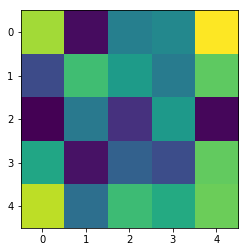

IndexError: list index out of range

In [215]:
import matplotlib.pyplot as plt

fig = plt.figure()

results = une_étape(1000,verbose=True)

# results[i] contient l'état au pas de temps i sous forme de matrice
im = plt.imshow(results[0], animated=True)
plt.show()

im = plt.imshow(results[999], animated=True)
plt.show()



def updatefig(i):
    im.set_array(results[i+1])
    return im


In [ ]:
definir degré de malveillance: nb de prsn malveillantes

In [ ]:
créer une fct qui montre ce qui se passe en une etape
si p individu !=0.5 alors deja_vu=True
prendre en compte influ voisinage
afficher en sortie la grille des p